In [3]:
import os, shutil
original_dataset_dir = 'D:\AI_ML\Dog_vs_Cat\petImages'
base_dir = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small'
#This and subsequent if statements serve to prevent the remaking of directories
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

#Loading cat images into train, validation, and test directories
fnames = ['cat({}).jpg'.format(i) for i in range(1, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


#Loading dog images into train, validation, and test directories
fnames = ['dog({}).jpg'.format(i) for i in range(1, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [4]:
print('total cat training images: ', len(os.listdir(train_cats_dir)))
print('total dog training images: ', len(os.listdir(train_dogs_dir)))
print('total cat validation images: ', len(os.listdir(validation_cats_dir)))
print('total dog validation images: ', len(os.listdir(validation_dogs_dir)))
print('total cat test images: ', len(os.listdir(test_cats_dir)))
print('total dog test images: ', len(os.listdir(test_dogs_dir)))

total cat training images:  999
total dog training images:  999
total cat validation images:  500
total dog validation images:  500
total cat test images:  500
total dog test images:  500


In [17]:
import keras
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

#Changed Conv2D to SeparableConv2D, optimizer to rmsprop, and loss to categorical_crossentropy
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#Adding dropout to help combat overfitting
model.add(layers.Dropout(0.5))
#Forgot to add Dense layer in previous version
model.add(layers.Dense(128))
model.add(BatchNormalization())
model.add(activation('relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [18]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=0.001), metrics=['acc'])

#Adding data augmentation to help combat overfitting
# train_datagen = ImageDataGenerator(
#     rescale=1./255, 
#     rotation_range=40, 
#     width_shift_range=0.2, 
#     height_shift_range=0.2, 
#     shear_range=0.2, 
#     zoom_range=0.2, 
#     horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=True)
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=True)
model.summary()

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 36, 36, 64)        256       
____________________________________

In [19]:
history = model.fit_generator(train_generator, steps_per_epoch=50, epochs=20, validation_data=validation_generator, validation_steps=50)

model.save('dogs_and_cats_small_7.h5')

Epoch 1/50
50/50 [==============================] - 11s 219ms/step - loss: 0.8178 - acc: 0.5631 - val_loss: 0.7075 - val_acc: 0.5438
Epoch 2/50
50/50 [==============================] - 9s 182ms/step - loss: 0.6782 - acc: 0.6049 - val_loss: 0.7438 - val_acc: 0.5077
Epoch 3/50
50/50 [==============================] - 9s 182ms/step - loss: 0.6608 - acc: 0.6081 - val_loss: 0.6679 - val_acc: 0.6187
Epoch 4/50
50/50 [==============================] - 9s 187ms/step - loss: 0.6282 - acc: 0.6555 - val_loss: 0.6885 - val_acc: 0.5483
Epoch 5/50
50/50 [==============================] - 9s 177ms/step - loss: 0.6377 - acc: 0.6492 - val_loss: 0.7291 - val_acc: 0.5749
Epoch 6/50
50/50 [==============================] - 11s 221ms/step - loss: 0.6277 - acc: 0.6425 - val_loss: 0.6210 - val_acc: 0.6134
Epoch 7/50
50/50 [==============================] - 9s 180ms/step - loss: 0.6122 - acc: 0.6643 - val_loss: 0.6114 - val_acc: 0.6548
Epoch 8/50
50/50 [==============================] - 10s 192ms/step - loss:

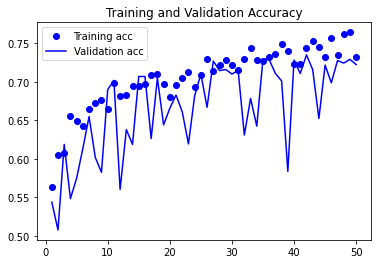

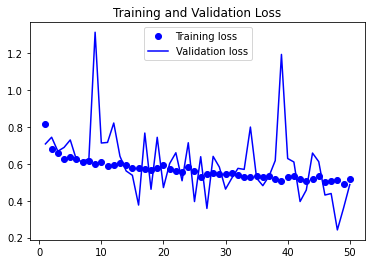

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [21]:
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

img_path = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small\\test\cats\cat(1500).jpg'
img_path2 = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small\\test\dogs\dog(1500).jpg'
img = image.load_img(img_path, target_size=(150, 150))

# x_test = img
# x = np.array(x_test)
# test_data_generator = ImageDataGenerator(rescale=1./255)
# text_labels = []

img2 = image.load_img(img_path2, target_size=(150, 150))


x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = image.img_to_array(img2)
y = np.expand_dims(y, axis=0)
y = preprocess_input(y)

This is a dog


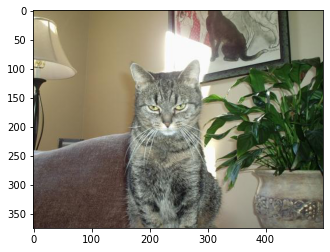

Predicted: [[1.]]
This is a dog


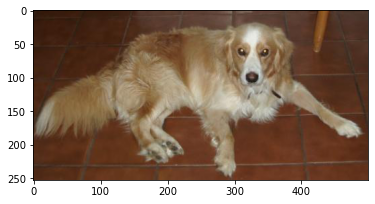

Predicted: [[1]]


In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

# plt.figure(figsize=(20, 20))
# pred = model.predict(test_data_generator.flow(x, batch_size=1))
# if pred > 0.5:
#     text_labels.append('dog')
# else:
#     text_labels.append('cat')
# plt.title('This is a ' + text_labels[0])
# imgplot = plt.imshow(x)
# plt.show()

preds = model.predict(x)
if preds > 0.5:
    print('This is a dog')
else:
    print('This is a cat')
displayImg = mpimg.imread(img_path)
imgplot = plt.imshow(displayImg)
plt.show()
print('Predicted:', preds)

preds2 = model.predict_classes(y)
if preds2 > 0.5:
    print('This is a dog')
else:
    print('This is a cat')
displayImg2 = mpimg.imread(img_path2)
imgplot = plt.imshow(displayImg2)
plt.show()
print('Predicted:', preds2)